## More Catalogue Tests

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

central_name='most_massive'

In [3]:
import fitsio as fi


# Read in the catalogues from coma
base = '/Users/hattifattener/Documents/ias/mbii/2pt/ns300_nd1000/v6/'
fid = fi.FITS('/Users/hattifattener/Documents/ias/mbii/cats/base_subhalo_shapes-v9-ndm1000-nst300.fits')[-1].read()
sym0 = fi.FITS('/Users/hattifattener/Documents/ias/mbii/cats/base_subhalo_shapes-v9-ndm1000-nst300-symmetrised00.fits')[-1].read()
sym = fi.FITS('/Users/hattifattener/Documents/ias/mbii/cats/base_subhalo_shapes-v9-ndm1000-nst300-galaxy-symmetrised.fits')[-1].read()

print 'Catalogues are all the same length:', fid.size==sym.size==sym0.size

Catalogues are all the same length: True


In [21]:
halo_ids = np.unique(fid['halo_id'])
rc = []
r0 = []
nocc=[]
for hid in halo_ids:
    mask = (fid['halo_id']==hid)
    x = fid['x'][mask]
    y = fid['y'][mask]
    z = fid['z'][mask]
    x0 = sym0['x0'][mask]
    y0 = sym0['y0'][mask]
    z0 = sym0['z0'][mask]
    r = np.sqrt((x-x0)**2+(y-y0)**2+(z-z0)**2)
    r0.append(r.min())
    try:
        rc.append(r[(fid['most_massive'][mask]==1)][0])
    except:
        rc.append(0)
    nocc.append(sym0['z0'][mask].size)
    


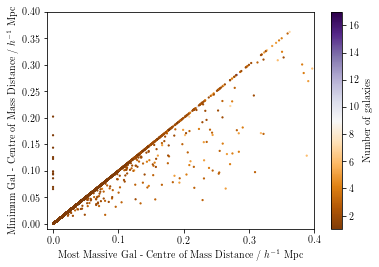

In [36]:
#fig=plt.figure()
#ax = fig.add_subplot(1, 1, 1)

plt.scatter(rc,r0, c=nocc, cmap='PuOr', s=1.5)
plt.xlim(-0.01,0.4)
plt.ylim(-0.01,0.4)
plt.xlabel('Most Massive Gal - Centre of Mass Distance / $h^{-1}$ Mpc')
plt.ylabel('Minimum Gal - Centre of Mass Distance / $h^{-1}$ Mpc')
plt.colorbar(label='Number of galaxies')
plt.show()

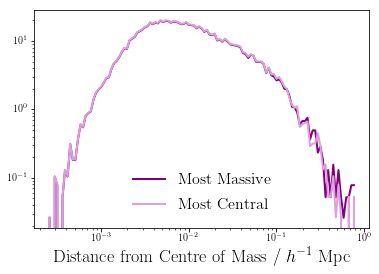

In [57]:
Hr,rbins = np.histogram(rc, bins=np.logspace(np.log10(0.00025),np.log10(0.8),120), normed=1)
Hr0,r0bins = np.histogram(r0, bins=np.logspace(np.log10(0.00025),np.log10(0.8),120), normed=1)

plt.plot(np.sqrt(rbins[:-1]*rbins[1:]), Hr, color='purple', lw=2, label='Most Massive')
plt.plot(np.sqrt(r0bins[:-1]*r0bins[1:]), Hr0, color='plum', lw=2, label='Most Central')
plt.legend(fontsize=16)
plt.xlabel('Distance from Centre of Mass / $h^{-1}$ Mpc', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [46]:
ndiff = halo_ids[np.array(rc)!=np.array(r0)].size
print 'Number of halos where most massive galaxy is not the centre-most: %s/%s (%3.3f percent)'%(ndiff,len(rc), 100.*ndiff/len(rc))

Number of halos where most massive galaxy is not the centre-most: 247/30528 (0.809 percent)
